In [72]:
import matplotlib.pyplot as plt
import numpy as np
import math 

In [73]:
def putpixel(data, x, y, color, alpha=1.0):
    x = int(x)
    y = int(y)
    bg = data [y][x]
    if(alpha>1.0):
        alpha=1.
    color2 = [0.0, 0.0 ,0.0 ]
    color2[0] = alpha * color[0] + (1.0 - alpha) *bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) *bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) *bg[2]
    data[y, x] = color2


In [74]:
def lineXW(x1:int, y1:int, x2:int, y2:int, data:np.array,color:list) -> np.array:
    def _fpart(x):
        return x - int(x)
 
    def _rfpart(x):
        return 1.0 - _fpart(x)
   
    
    def _round(x):
        return int(np.floor(x+0.5))

    dx = x2 - x1
    dy = y2 - y1
    
    steep = abs(dx) < abs(dy)
    if(steep):
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    if( x2 < x1):
        x1,x2 = x2,x1
        y1,y2 = y2,y1
    dx = x2 - x1
    dy = y2 - y1
    
    gradient = dy/dx
    
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _fpart(x1 + 0.5)
    xpxl1 = xend
    ypxl1 = np.floor(yend)
    
    if(steep):
        putpixel(data, ypxl1, xpxl1,color, _rfpart(yend) * xgap)
        putpixel(data, ypxl1 + 1, xpxl1, color, _fpart(yend) * xgap)
    else:
        putpixel(data, xpxl1,ypxl1, color, _rfpart(yend) * xgap)
        putpixel(data, xpxl1,ypxl1 + 1, color, _fpart(yend) * xgap)
    
    intery = yend + gradient
    xend = np.round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _fpart(x2 + 0.5)
    xpxl2 = xend
    ypxl2 = np.floor(yend)
    
    if(steep):
        putpixel(data, ypxl2, xpxl2, color, _rfpart(yend) * xgap)
        putpixel(data, ypxl2+1, xpxl2, color, _fpart(yend) * xgap)
    else:
        putpixel(data, xpxl2, ypxl2, color, _rfpart(yend) * xgap)
        putpixel(data, xpxl2, ypxl2 + 1, color, _fpart(yend) * xgap)
                 
    if(steep):
        for x in range(xpxl1 + 1, xpxl2):
            putpixel(data, np.floor(intery), x, color, _rfpart(intery))
            putpixel(data, np.floor(intery) + 1, x, color, _fpart(intery))
            intery = intery + gradient
    else:
        for x in range(xpxl1 + 1, xpxl2):
            putpixel(data, x, np.floor(intery), color, _rfpart(intery))
            putpixel(data, x, np.floor(intery) + 1, color, _fpart(intery))
            intery = intery + gradient
    return data

In [75]:
def heron(x1:int,y1:int,x2:int,y2:int,x3:int,y3:int):
    """Funkcja zwracajaca pole trojkaza zlozonego z punktow A[x1,y1], B[x2,y2], C[x3,y3]

    Args:
        x1 (int): Wspolrzedna x punktu A
        y1 (int): Wspolrzedna y punktu A
        x2 (int): Wspolrzedna x punktu B
        y2 (int): Wspolrzedna y punktu B
        x3 (int): Wspolrzedna x punktu C
        y3 (int): Wspolrzedna y punktu C

    Returns:
        _type_: _description_
    """
    
    AB = math.sqrt(math.pow(x2-x1,2) + math.pow(y2-y1,2))
    BC = math.sqrt(math.pow(x3-x2,2) + math.pow(y3-y2,2))
    AC = math.sqrt(math.pow(x3-x1,2) + math.pow(y3-y1,2))
    p = 1/2 * (AB + BC + AC)
    
    wartosc = (p * abs(p-AB) * abs(p-BC) * abs(p-AC))
    pole = math.sqrt(wartosc)
    
    return pole

In [122]:
def quadrilateral(n:int, m:int, P1:list, P2:list, P3:list, P4:list, fill=0) -> np.array:
    """
    Funkcja rysujaca czworokat na polu o podanych wymiarach [n x m].
    O punktach kolejnk: P1, P2, P3 i P4, zawierajace wspolrzedne tych punktow
    Z mozliwoscia rysowania czworokatu z oraz bez wypelnienia.
    Args:
        n (int): szerokosc zwracanej tablicy rgb
        m (int): wysokosc zwracanej tablicy rgb
        P1 (list): wspolrzedne punktu P1
        P2 (list): wspolrzedne punktu P2
        P3 (list): wspolrzedne punktu P3
        P4 (list): wspolrzedne punktu P4
        fill (int, optional): Wartosc oznaczajaca czy rysowany czworokat ma byc wypelniony czy ma byc rysowany tylko obwod.
        Dla wartosci 1 rysowana jest wypelniona elipsa.
        Dla wartosci 0 rysowany jest obwod elipsy i jest to wartosc domyslna.
    Returns:
        numpy.Array: Tablica RGB z narysowanym niebieski czworokatem na bialym tle
        
          P2                         P3 
            #########################
            #                       #
            #                       #
            #                       #
            #                       #  
            #                       #
            #                       #
            #                       #
            #########################
          P1                         P4 
    """
    assert n > 0, "Tablica RGB musi posiadac wartosc n wiekszy od 0"
    assert m > 0, "Tablica RGB musi posiadac wartosc m wieksza od 0"
    assert fill == 0 or fill == 1, "Wartosc fill moze przyjmowac tylko wartosci 0 lub 1"
    
    assert P1[0] < P4[0] and P1[1] < P2[1] and (P1[0] < P3[0] and P1[1] < P3[1]), "Punkt P1 jest lewym dolnym punktem czworokata"
    assert P2[1] > P1[1] and P1[0] < P3[0] and (P2[0] < P4[0] and P2[1] > P4[1]), "Punkt P2 jest lewym prawym punktem czworokata"
    assert P3[0] > P2[0] and P3[1] > P4[1] and (P3[0] > P1[0] and P3[1] > P1[1]), "Punkt P3 jest prawym gornym punktem czworokata"
    assert P4[0] > P1[0] and P4[1] < P3[1] and (P4[0] > P1[0] and P4[1] < P2[1]), "Punkt P4 jest prawym dolnym punktem czworokata"
    
    RGB = np.zeros((n,m,3), dtype=np.uint8)
    RGB.fill(255)
    
    RGB = lineXW(P1[0],P1[1],P2[0],P2[1],RGB,[0,0,255]) #AB
    RGB = lineXW(P2[0],P2[1],P3[0],P3[1],RGB,[0,0,255]) #BC
    RGB = lineXW(P3[0],P3[1],P4[0],P4[1],RGB,[0,0,255]) #CD
    RGB = lineXW(P1[0],P1[1],P4[0],P4[1],RGB,[0,0,255]) #AD
    if fill == 1:
        
        for x in range(min(P1[0],P2[0],P3[0],P4[0])+1,max(P1[0],P2[0],P3[0],P4[0])):
            for y in range(min(P1[1],P2[1],P3[1],P4[1]) +1,max(P1[1],P2[1],P3[1],P4[1])):
                
                if(heron(P1[0],P1[1],P2[0],P2[1],P3[0],P3[1])+1 >= heron(P1[0],P1[1],P2[0],P2[1],x,y) + heron(P1[0],P1[1],x,y,P3[0],P3[1]) + heron(x,y,P2[0],P2[1],P3[0],P3[1])):
                   RGB[y,x,0] = 0
                   RGB[y,x,1] = 0
                   RGB[y,x,2] = 255
                
                elif(heron(P4[0],P4[1],P1[0],P1[1],P3[0],P3[1])+1 >= heron(P4[0],P4[1],P1[0],P1[1],x,y) + heron(P4[0],P4[1],x,y,P3[0],P3[1]) + heron(x,y,P1[0],P1[1],P3[0],P3[1])):
                   RGB[y,x,0] = 0
                   RGB[y,x,1] = 0
                   RGB[y,x,2] = 255
    return RGB

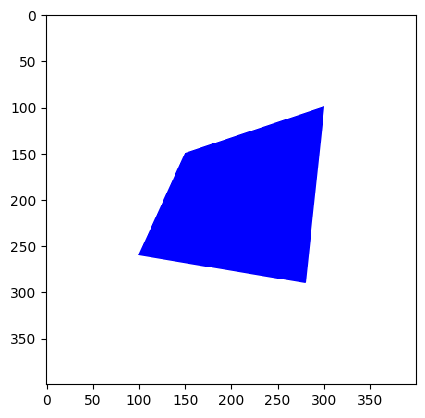

In [128]:
data = quadrilateral(400,400,[150,150],[100,260],[280,290],[300,100],1)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()
plt.imsave('test.png', data, format='png')
